In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minepy import MINE

### Purpose：In this experiment, the maximum mutual information coefficient（MIC） and Pearson correlation coefficient are used to conduct correlation analysis on the influencing factors of users' electricity consumption data, and the nonlinear relationship between different data features is effectively mined.Through the results of correlation analysis, feature selection is carried out, and the strong correlation features are input into the deep neural network for further analysis to reduce the redundancy calculation and realize the real-time and efficient processing of power data.

# 1. Data Preprocessing

# (1) Electricity load data preprocessing

In [2]:
#Read hourly electricity consumption data for 20 regions in the United States between January 1, 2004 and June 30, 2008
df = pd.read_csv("Load_history.csv") 
df

,zone_id,year,month,day,h1,h2,h3,h4,h5,h6,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
0,1,2004,1,1,"16,853","16,450","16,517","16,873","17,064","17,727",...,"13,518","13,138","14,130","16,809","18,150","18,235","17,925","16,904","16,162","14,750"
1,1,2004,1,2,"14,155","14,038","14,019","14,489","14,920","16,072",...,"16,127","15,448","15,839","17,727","18,895","18,650","18,443","17,580","16,467","15,258"
2,1,2004,1,3,"14,439","14,272","14,109","14,081","14,775","15,491",...,"13,507","13,414","13,826","15,825","16,996","16,394","15,406","14,278","13,315","12,424"
3,1,2004,1,4,"11,273","10,415","9,943","9,859","9,881","10,248",...,"14,207","13,614","14,162","16,237","17,430","17,218","16,633","15,238","13,580","11,727"
4,1,2004,1,5,"10,750","10,321","10,107","10,065","10,419","12,101",...,"13,845","14,350","15,501","17,307","18,786","19,089","19,192","18,416","17,006","16,018"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32995,20,2008,7,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32996,20,2008,7,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32997,20,2008,7,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32998,20,2008,7,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
#Extract the electricity consumption data of Region 1 in 2004 and 2007 for analysis (731 pieces of data)
df_zone1 = df.loc[(df["zone_id"] == 1)&((df["year"] == 2004)|(df["year"] == 2007))]
df_zone1.info()
df_zone1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 1460
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   zone_id  731 non-null    int64 
 1   year     731 non-null    int64 
 2   month    731 non-null    int64 
 3   day      731 non-null    int64 
 4   h1       731 non-null    object
 5   h2       731 non-null    object
 6   h3       731 non-null    object
 7   h4       731 non-null    object
 8   h5       731 non-null    object
 9   h6       731 non-null    object
 10  h7       731 non-null    object
 11  h8       731 non-null    object
 12  h9       731 non-null    object
 13  h10      731 non-null    object
 14  h11      731 non-null    object
 15  h12      731 non-null    object
 16  h13      731 non-null    object
 17  h14      731 non-null    object
 18  h15      731 non-null    object
 19  h16      731 non-null    object
 20  h17      731 non-null    object
 21  h18      731 non-null    object
 22  h

,zone_id,year,month,day,h1,h2,h3,h4,h5,h6,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
0,1,2004,1,1,"16,853","16,450","16,517","16,873","17,064","17,727",...,"13,518","13,138","14,130","16,809","18,150","18,235","17,925","16,904","16,162","14,750"
1,1,2004,1,2,"14,155","14,038","14,019","14,489","14,920","16,072",...,"16,127","15,448","15,839","17,727","18,895","18,650","18,443","17,580","16,467","15,258"
2,1,2004,1,3,"14,439","14,272","14,109","14,081","14,775","15,491",...,"13,507","13,414","13,826","15,825","16,996","16,394","15,406","14,278","13,315","12,424"
3,1,2004,1,4,"11,273","10,415","9,943","9,859","9,881","10,248",...,"14,207","13,614","14,162","16,237","17,430","17,218","16,633","15,238","13,580","11,727"
4,1,2004,1,5,"10,750","10,321","10,107","10,065","10,419","12,101",...,"13,845","14,350","15,501","17,307","18,786","19,089","19,192","18,416","17,006","16,018"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1,2007,12,27,"22,655","22,591","22,498","22,240","22,145","23,139",...,"14,334","14,103","15,295","18,687","20,909","21,536","21,306","20,638","19,896","18,519"
1457,1,2007,12,28,"17,908","18,308","19,020","19,794","20,920","22,076",...,"20,622","21,014","22,521","24,334","24,635","24,063","22,725","21,627","20,189","18,651"
1458,1,2007,12,29,"17,195","16,531","15,991","16,059","16,250","16,830",...,"17,310","16,722","17,638","19,633","20,512","20,475","20,101","19,315","18,653","17,592"
1459,1,2007,12,30,"16,164","15,543","15,608","15,368","15,425","15,641",...,"23,501","23,423","23,489","24,915","25,056","24,705","23,807","22,660","21,089","19,408"


In [133]:
#Extractions of power load H24 and influence factors month,day, H21, H22 and H23 of the target data were extracted
df_factors1 = df_zone1.loc[:,["year","month","day","h19","h20","h21","h22","h23","h24"]].iloc[1:,:]
df_factors1.index=range(0,len(df_factors1))
df_factors1

,year,month,day,h19,h20,h21,h22,h23,h24
0,2004,1,2,"18,895","18,650","18,443","17,580","16,467","15,258"
1,2004,1,3,"16,996","16,394","15,406","14,278","13,315","12,424"
2,2004,1,4,"17,430","17,218","16,633","15,238","13,580","11,727"
3,2004,1,5,"18,786","19,089","19,192","18,416","17,006","16,018"
4,2004,1,6,"28,060","28,768","28,919","28,653","27,406","26,507"
...,...,...,...,...,...,...,...,...,...
725,2007,12,27,"20,909","21,536","21,306","20,638","19,896","18,519"
726,2007,12,28,"24,635","24,063","22,725","21,627","20,189","18,651"
727,2007,12,29,"20,512","20,475","20,101","19,315","18,653","17,592"
728,2007,12,30,"25,056","24,705","23,807","22,660","21,089","19,408"


In [134]:
#Extraction of influence factors D-1 H24 (electricity consumption at the same time the day before)
df_factors2 = df_zone1.loc[:,["h24"]].iloc[:-1,:]
df_factors2.columns=["d-1_h24"]
df_factors2.index=range(0,len(df_factors2))
df_factors2

,d-1_h24
0,"14,750"
1,"15,258"
2,"12,424"
3,"11,727"
4,"16,018"
...,...
725,"22,979"
726,"18,519"
727,"18,651"
728,"17,592"


In [135]:
#Combine the influencing factors
df_factors3 = df_factors1.join(df_factors2).loc[:,["year","month","day","h19","h20","h21","h22","h23","d-1_h24","h24"]]
df_factors3.info()
df_factors3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     730 non-null    int64 
 1   month    730 non-null    int64 
 2   day      730 non-null    int64 
 3   h19      730 non-null    object
 4   h20      730 non-null    object
 5   h21      730 non-null    object
 6   h22      730 non-null    object
 7   h23      730 non-null    object
 8   d-1_h24  730 non-null    object
 9   h24      730 non-null    object
dtypes: int64(3), object(7)
memory usage: 57.2+ KB


,year,month,day,h19,h20,h21,h22,h23,d-1_h24,h24
0,2004,1,2,"18,895","18,650","18,443","17,580","16,467","14,750","15,258"
1,2004,1,3,"16,996","16,394","15,406","14,278","13,315","15,258","12,424"
2,2004,1,4,"17,430","17,218","16,633","15,238","13,580","12,424","11,727"
3,2004,1,5,"18,786","19,089","19,192","18,416","17,006","11,727","16,018"
4,2004,1,6,"28,060","28,768","28,919","28,653","27,406","16,018","26,507"
...,...,...,...,...,...,...,...,...,...,...
725,2007,12,27,"20,909","21,536","21,306","20,638","19,896","22,979","18,519"
726,2007,12,28,"24,635","24,063","22,725","21,627","20,189","18,519","18,651"
727,2007,12,29,"20,512","20,475","20,101","19,315","18,653","18,651","17,592"
728,2007,12,30,"25,056","24,705","23,807","22,660","21,089","17,592","19,408"


## （2） Weather data proprecessing

In [7]:
#Read the hourly temperatures at 11 weather stations in the United States from January 1, 2004 to June 30, 2008
df2 = pd.read_csv("temperature_history.csv")
df2

,station_id,year,month,day,h1,h2,h3,h4,h5,h6,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
0,1,2004,1,1,46,46,45,41,39,35,...,55.0,55.0,52.0,46.0,40.0,40.0,39.0,38.0,40.0,41.0
1,1,2004,1,2,43,44,46,46,47,47,...,54.0,56.0,57.0,53.0,50.0,47.0,46.0,45.0,45.0,45.0
2,1,2004,1,3,45,46,46,44,43,46,...,69.0,68.0,68.0,65.0,64.0,63.0,62.0,63.0,63.0,62.0
3,1,2004,1,4,63,62,62,62,60,60,...,71.0,72.0,71.0,68.0,67.0,67.0,65.0,64.0,65.0,64.0
4,1,2004,1,5,64,63,65,64,64,64,...,66.0,66.0,66.0,66.0,63.0,54.0,52.0,49.0,47.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18068,11,2008,6,26,63,62,62,62,61,61,...,89.0,89.0,91.0,89.0,88.0,85.0,79.0,76.0,75.0,72.0
18069,11,2008,6,27,73,71,71,69,66,68,...,86.0,86.0,86.0,86.0,83.0,81.0,78.0,75.0,73.0,71.0
18070,11,2008,6,28,71,71,72,71,69,69,...,88.0,89.0,89.0,80.0,78.0,77.0,73.0,71.0,71.0,71.0
18071,11,2008,6,29,69,69,67,66,66,67,...,79.0,81.0,81.0,81.0,79.0,78.0,73.0,72.0,70.0,70.0


In [138]:
#Extraction of temperature data (°F) from weather station 1 in 2007  as influencing factors
df_station1 = df2.loc[(df2["station_id"] == 1)&((df2["year"] == 2004)|(df2["year"] == 2007))]
df_station1.info()
df_station1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 1460
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  731 non-null    int64  
 1   year        731 non-null    int64  
 2   month       731 non-null    int64  
 3   day         731 non-null    int64  
 4   h1          731 non-null    int64  
 5   h2          731 non-null    int64  
 6   h3          731 non-null    int64  
 7   h4          731 non-null    int64  
 8   h5          731 non-null    int64  
 9   h6          731 non-null    int64  
 10  h7          731 non-null    float64
 11  h8          731 non-null    float64
 12  h9          731 non-null    float64
 13  h10         731 non-null    float64
 14  h11         731 non-null    float64
 15  h12         731 non-null    float64
 16  h13         731 non-null    float64
 17  h14         731 non-null    float64
 18  h15         731 non-null    float64
 19  h16         731 non-null    

,station_id,year,month,day,h1,h2,h3,h4,h5,h6,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
0,1,2004,1,1,46,46,45,41,39,35,...,55.0,55.0,52.0,46.0,40.0,40.0,39.0,38.0,40.0,41.0
1,1,2004,1,2,43,44,46,46,47,47,...,54.0,56.0,57.0,53.0,50.0,47.0,46.0,45.0,45.0,45.0
2,1,2004,1,3,45,46,46,44,43,46,...,69.0,68.0,68.0,65.0,64.0,63.0,62.0,63.0,63.0,62.0
3,1,2004,1,4,63,62,62,62,60,60,...,71.0,72.0,71.0,68.0,67.0,67.0,65.0,64.0,65.0,64.0
4,1,2004,1,5,64,63,65,64,64,64,...,66.0,66.0,66.0,66.0,63.0,54.0,52.0,49.0,47.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1,2007,12,27,42,42,42,42,41,41,...,55.0,55.0,55.0,50.0,48.0,47.0,45.0,43.0,40.0,40.0
1457,1,2007,12,28,41,38,38,38,38,37,...,54.0,53.0,53.0,52.0,52.0,52.0,52.0,54.0,54.0,55.0
1458,1,2007,12,29,56,58,59,59,62,62,...,54.0,54.0,54.0,53.0,53.0,53.0,53.0,51.0,51.0,50.0
1459,1,2007,12,30,49,48,48,47,47,47,...,46.0,46.0,47.0,47.0,46.0,45.0,46.0,47.0,48.0,48.0


In [139]:
#Extraction of influencing factor TEMP H24: the temperature of the day
df_factors4 = df_station1.loc[:,["h24"]].iloc[1:,:]
df_factors4.index=range(0,len(df_factors4))
df_factors4.columns=["temp_h24"]
df_factors4.info()
df_factors4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   temp_h24  730 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


,temp_h24
0,45.0
1,62.0
2,64.0
3,47.0
4,32.0
...,...
725,40.0
726,55.0
727,50.0
728,48.0


In [140]:
#Combine the temperature, the influence factors of historical electricity consumption and date type
df_factors5 = df_factors3.join(df_factors4).loc[:,["year","month","day","h19","h20","h21","h22","h23","d-1_h24","temp_h24","h24"]]
df_factors5.info()
df_factors5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      730 non-null    int64  
 1   month     730 non-null    int64  
 2   day       730 non-null    int64  
 3   h19       730 non-null    object 
 4   h20       730 non-null    object 
 5   h21       730 non-null    object 
 6   h22       730 non-null    object 
 7   h23       730 non-null    object 
 8   d-1_h24   730 non-null    object 
 9   temp_h24  730 non-null    float64
 10  h24       730 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 62.9+ KB


,year,month,day,h19,h20,h21,h22,h23,d-1_h24,temp_h24,h24
0,2004,1,2,"18,895","18,650","18,443","17,580","16,467","14,750",45.0,"15,258"
1,2004,1,3,"16,996","16,394","15,406","14,278","13,315","15,258",62.0,"12,424"
2,2004,1,4,"17,430","17,218","16,633","15,238","13,580","12,424",64.0,"11,727"
3,2004,1,5,"18,786","19,089","19,192","18,416","17,006","11,727",47.0,"16,018"
4,2004,1,6,"28,060","28,768","28,919","28,653","27,406","16,018",32.0,"26,507"
...,...,...,...,...,...,...,...,...,...,...,...
725,2007,12,27,"20,909","21,536","21,306","20,638","19,896","22,979",40.0,"18,519"
726,2007,12,28,"24,635","24,063","22,725","21,627","20,189","18,519",55.0,"18,651"
727,2007,12,29,"20,512","20,475","20,101","19,315","18,653","18,651",50.0,"17,592"
728,2007,12,30,"25,056","24,705","23,807","22,660","21,089","17,592",48.0,"19,408"


## (3) Holiday data reprocessing

In [141]:
import calendar
#Extract U.S. federal holiday dates
df3 = pd.read_csv("Holiday_List.csv")
df3

,Unnamed: 0,2004,2005,2006,2007,2008
0,New Year's Day,"Thursday, January 1","Friday, December 31, 2004","Monday, January 2","Monday, January 1","Tuesday, January 1"
1,"Birthday of Martin Luther King, Jr.","Monday, January 19","Monday, January 17","Monday, January 16","Monday, January 15","Monday, January 21"
2,Washington's Birthday,"Monday, February 16","Monday, February 21","Monday, February 20","Monday, February 19","Monday, February 18"
3,Memorial Day,"Monday, May 31","Monday, May 30","Monday, May 29","Monday, May 28","Monday, May 26"
4,Independence Day,"Monday, July 5","Monday, July 4","Tuesday, July 4","Wednesday, July 4","Friday, July 4"
5,Labor Day,"Monday, September 6","Monday, September 5","Monday, September 4","Monday, September 3",NaN
6,Columbus Day,"Monday, October 11","Monday, October 10","Monday, October 9","Monday, October 8",NaN
7,Veterans Day,"Thursday, November 11","Friday, November 11","Friday, November 10","Monday, November 12",NaN
8,Thanksgiving Day,"Thursday, November 25","Thursday, November 24","Thursday, November 23","Thursday, November 22",NaN
9,Christmas Day,"Friday, December 24","Monday, December 26","Monday, December 25","Tuesday, December 25",NaN


In [142]:
#Extract 2007 holiday week, date
l1 = [j for i in df3["2007"].str.split(", ").tolist() for j in i]
#Extract date, excluding week data
l2 = [j for i in pd.Series(l1[1::2]).str.split(" ").tolist() for j in i]
#Extract holiday month numbers
mon = [list(calendar.month_name).index(i) for i in l2[::2]]
#Extract holiday day numbers
day = [int(i) for i in l2[1::2]]
#The extracted month and date are composed of a DataFrame
date = pd.DataFrame(np.vstack((mon,day))).transpose()
date.columns = ["month", "day"]
date

,month,day
0,1,1
1,1,15
2,2,19
3,5,28
4,7,4
5,9,3
6,10,8
7,11,12
8,11,22
9,12,25


In [143]:
#Generate the holiday influencing factor dataframe
holiday = pd.DataFrame(np.full((date.shape[0],1), 3), columns=["holiday"])
df_factors6 = date.join(holiday)
df_factors6

,month,day,holiday
0,1,1,3
1,1,15,3
2,2,19,3
3,5,28,3
4,7,4,3
5,9,3,3
6,10,8,3
7,11,12,3
8,11,22,3
9,12,25,3


In [144]:
df_factors7 = df_factors5.merge(df_factors6, how="left")
df_factors7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      730 non-null    int64  
 1   month     730 non-null    int64  
 2   day       730 non-null    int64  
 3   h19       730 non-null    object 
 4   h20       730 non-null    object 
 5   h21       730 non-null    object 
 6   h22       730 non-null    object 
 7   h23       730 non-null    object 
 8   d-1_h24   730 non-null    object 
 9   temp_h24  730 non-null    float64
 10  h24       730 non-null    object 
 11  holiday   19 non-null     float64
dtypes: float64(2), int64(3), object(7)
memory usage: 74.1+ KB


In [145]:
df_factors7.fillna(1,inplace=True)

In [146]:
df_factors8 = df_factors7[["year","month","day","holiday","h19","h20","h21","h22","h23","d-1_h24","temp_h24","h24"]]
df_factors8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      730 non-null    int64  
 1   month     730 non-null    int64  
 2   day       730 non-null    int64  
 3   holiday   730 non-null    float64
 4   h19       730 non-null    object 
 5   h20       730 non-null    object 
 6   h21       730 non-null    object 
 7   h22       730 non-null    object 
 8   h23       730 non-null    object 
 9   d-1_h24   730 non-null    object 
 10  temp_h24  730 non-null    float64
 11  h24       730 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 74.1+ KB


In [147]:
#Convert the thousandths and segmented digits in the electricity consumption data to numeric types
from locale import *
setlocale(LC_NUMERIC, 'English_US')
df_factors8["h24"] = pd.DataFrame([atof(i) for i in list(df_factors8["h24"])])
df_factors8["h19"] = pd.DataFrame([atof(i) for i in list(df_factors8["h19"])])
df_factors8["h20"] = pd.DataFrame([atof(i) for i in list(df_factors8["h20"])])
df_factors8["h21"] = pd.DataFrame([atof(i) for i in list(df_factors8["h21"])])
df_factors8["h22"] = pd.DataFrame([atof(i) for i in list(df_factors8["h22"])])
df_factors8["h23"] = pd.DataFrame([atof(i) for i in list(df_factors8["h23"])])
df_factors8["d-1_h24"] = pd.DataFrame([atof(i) for i in list(df_factors8["d-1_h24"])])

In [148]:
df_factors8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      730 non-null    int64  
 1   month     730 non-null    int64  
 2   day       730 non-null    int64  
 3   holiday   730 non-null    float64
 4   h19       730 non-null    float64
 5   h20       730 non-null    float64
 6   h21       730 non-null    float64
 7   h22       730 non-null    float64
 8   h23       730 non-null    float64
 9   d-1_h24   730 non-null    float64
 10  temp_h24  730 non-null    float64
 11  h24       730 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 74.1 KB


# 2. Maximum Mutual Information Coefficient (MIC) Correlation Analysis

## （1） Correlation analysis with temperature data

MIC: 0.36079561713428626
Pearson: -0.3401105551492868


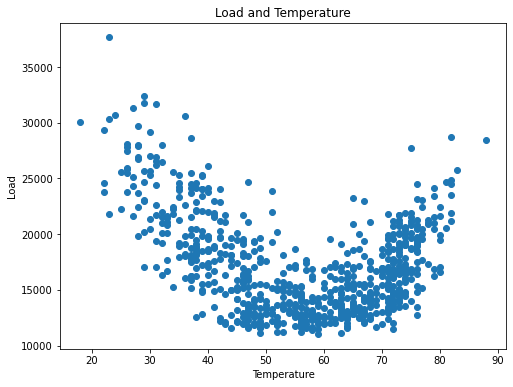

In [149]:
#Correlation analysis of electricity consumption data and temperature data
x1 = df_factors8["temp_h24"]
y1 = df_factors8["h24"]
mine = MINE(alpha = 0.6, c = 15) 
mine.compute_score(x1, y1)
mic1 = mine.mic() #0.41602
pearson1 = np.corrcoef(x1, y1)[0, 1]
fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.add_subplot(1,1,1)
ax1.scatter(x1, y1)
ax1.set_title("Load and Temperature")
ax1.set_ylabel('Load')
ax1.set_xlabel('Temperature')
print("MIC:", mic1)
print("Pearson:",pearson1)

## （2）Correlation analysis with T-5 time power consumption data

MIC: 0.6280197835215799
Pearson: 0.7717325600818139


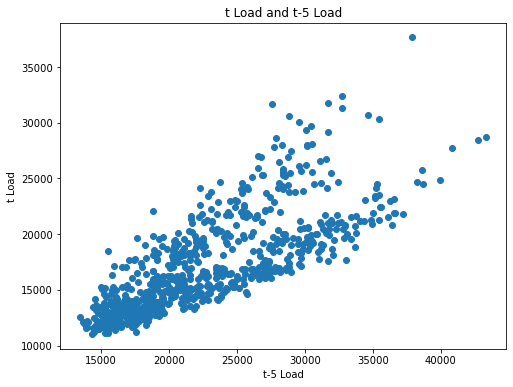

In [150]:
#Correlation analysis of power consumption data at time t and power consumption data at time t-5
x2 = df_factors8["h19"]
y2 = df_factors8["h24"]
mine = MINE(alpha = 0.6, c = 15)
mine.compute_score(x2, y2)
mic2 = mine.mic()
pearson2 = np.corrcoef(x2, y2)[0, 1]
fig2 = plt.figure(figsize=(8,6))
ax2 = fig2.add_subplot(1,1,1)
ax2.scatter(x2, y2)
ax2.set_title("t Load and t-5 Load")
ax2.set_ylabel('t Load')
ax2.set_xlabel('t-5 Load')
print("MIC:", mic2)
print("Pearson:",pearson2)

## （3） Correlation analysis with T-4 time electricity consumption data

MIC: 0.7116427155210783
Pearson: 0.8438128766168697


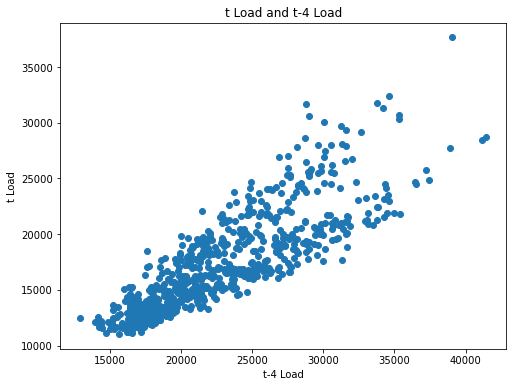

In [151]:
#Correlation analysis of power consumption data at time t and time t-4
x3 = df_factors8["h20"]
y3 = df_factors8["h24"]
mine = MINE(alpha = 0.6, c = 15)
mine.compute_score(x3, y3)
mic3 = mine.mic()
pearson3 = np.corrcoef(x3, y3)[0, 1]
fig3 = plt.figure(figsize=(8,6))
ax3 = fig3.add_subplot(1,1,1)
ax3.scatter(x3, y3)
ax3.set_title("t Load and t-4 Load")
ax3.set_ylabel('t Load')
ax3.set_xlabel('t-4 Load')
print("MIC:", mic3)
print("Pearson:",pearson3)

## （4） Correlation analysis of power consumption data with T-3 time

MIC: 0.75597679429971
Pearson: 0.8895585789414785


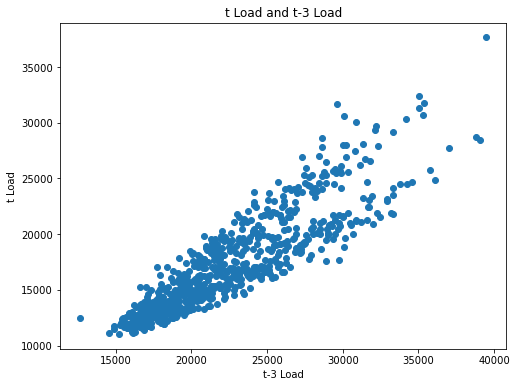

In [152]:
#Correlation analysis of power consumption data at time t and time t-3
x4 = df_factors8["h21"]
y4 = df_factors8["h24"]
mine = MINE(alpha = 0.6, c = 15)
mine.compute_score(x4, y4)
mic4 = mine.mic()
pearson4 = np.corrcoef(x4, y4)[0, 1]
fig4 = plt.figure(figsize=(8,6))
ax4 = fig4.add_subplot(1,1,1)
ax4.scatter(x4, y4)
ax4.set_title("t Load and t-3 Load")
ax4.set_ylabel('t Load')
ax4.set_xlabel('t-3 Load')
print("MIC:", mic4)
print("Pearson:",pearson4)

## （5） Correlation analysis of power consumption data with T-2 time

MIC: 0.8034830037027486
Pearson: 0.9209845867073718


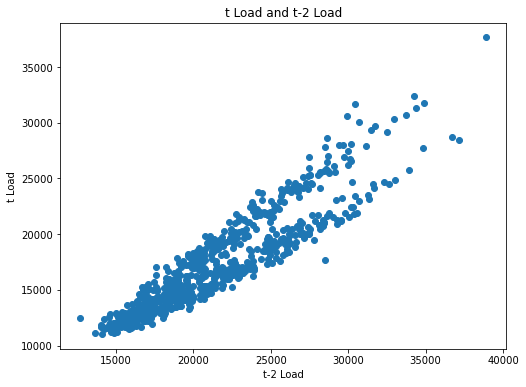

In [154]:
#Correlation analysis of power consumption data at time t and time t-2
x5 = df_factors8["h22"]
y5 = df_factors8["h24"]
mine = MINE(alpha = 0.6, c = 15)
mine.compute_score(x5, y5)
mic5 = mine.mic()
pearson5 = np.corrcoef(x5, y5)[0, 1]
fig5 = plt.figure(figsize=(8,6))
ax5 = fig5.add_subplot(1,1,1)
ax5.scatter(x5, y5)
ax5.set_title("t Load and t-2 Load")
ax5.set_ylabel('t Load')
ax5.set_xlabel('t-2 Load')
print("MIC:", mic5)
print("Pearson:",pearson5)

## （6） Correlation analysis of power consumption data at time T-1

MIC: 0.9274100638274017
Pearson: 0.9770303575334746


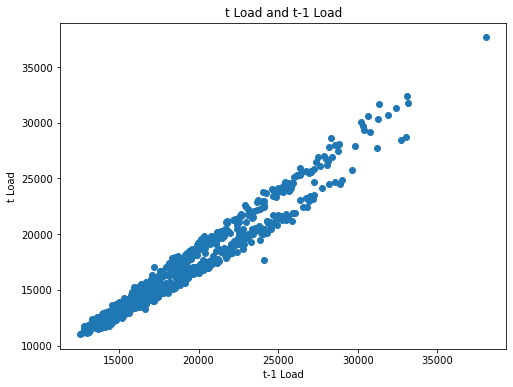

In [155]:
#Correlation analysis of power consumption data at time t and time t-1
x6 = df_factors8["h23"]
y6 = df_factors8["h24"]
mine = MINE(alpha = 0.6, c = 15)
mine.compute_score(x6, y6)
mic6 = mine.mic()
pearson6 = np.corrcoef(x6, y6)[0, 1]
fig6 = plt.figure(figsize=(8,6))
ax6 = fig6.add_subplot(1,1,1)
ax6.scatter(x6, y6)
ax6.set_title("t Load and t-1 Load")
ax6.set_ylabel('t Load')
ax6.set_xlabel('t-1 Load')
print("MIC:", mic6)
print("Pearson:",pearson6)

## （7） Correlation analysis with electricity consumption data at time d-1, t

MIC: 0.590610460498025
Pearson: 0.8120574959399901


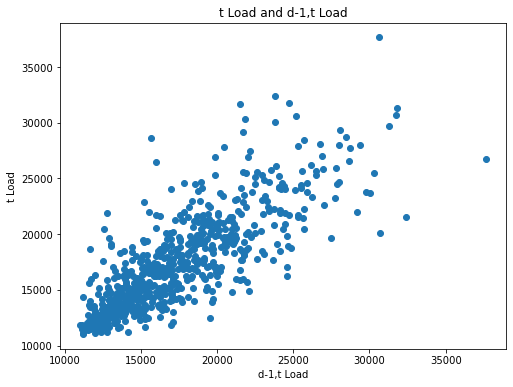

In [156]:
#Correlation analysis of the electricity consumption data at time t and the electricity consumption data at time d-1 and t
x7 = df_factors8["d-1_h24"]
y7 = df_factors8["h24"]
mine = MINE(alpha = 0.6, c = 15)
mine.compute_score(x7, y7)
mic7 = mine.mic()
pearson7 = np.corrcoef(x7, y7)[0, 1]
fig7 = plt.figure(figsize=(8,6))
ax7 = fig7.add_subplot(1,1,1)
ax7.scatter(x7, y7)
ax7.set_title("t Load and d-1,t Load")
ax7.set_ylabel('t Load')
ax7.set_xlabel('d-1,t Load')
print("MIC:", mic7)
print("Pearson:",pearson7)

## （8）Correlation analysis with holiday data

MIC: 0.11471412255072438
Pearson: -0.001622982090725829


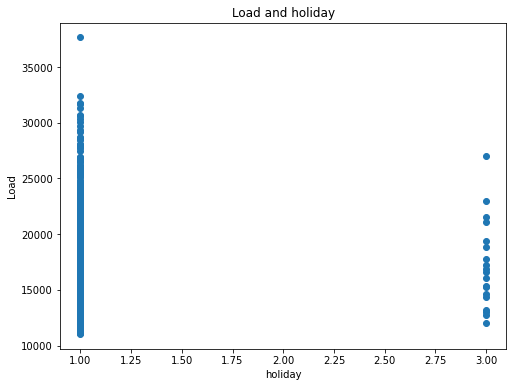

In [157]:
#Correlation analysis of electricity consumption data at time t and holiday data
x8 = df_factors8["holiday"]
y8 = df_factors8["h24"]
mine = MINE(alpha = 0.6, c = 15)
mine.compute_score(x8, y8)
mic8 = mine.mic()
pearson8 = np.corrcoef(x8, y8)[0, 1]
fig8 = plt.figure(figsize=(8,6))
ax8 = fig8.add_subplot(1,1,1)
ax8.scatter(x8, y8)
ax8.set_title("Load and holiday")
ax8.set_ylabel('Load')
ax8.set_xlabel('holiday')
print("MIC:", mic8)
print("Pearson:",pearson8)

## （9） Correlation analysis with monthly data

MIC: 0.3137707191314092
Pearson: -0.17438047481418562


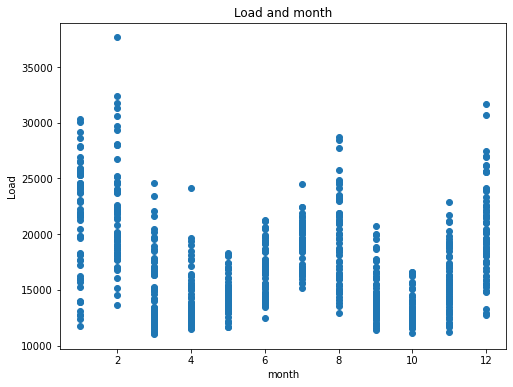

In [158]:
#Correlation analysis of electricity consumption data at time t and monthly data
x9 = df_factors8["month"]
y9 = df_factors8["h24"]
mine = MINE(alpha = 0.6, c = 15)
mine.compute_score(x9, y9)
mic9 = mine.mic()
pearson9 = np.corrcoef(x9, y9)[0, 1]
fig9 = plt.figure(figsize=(8,6))
ax9 = fig9.add_subplot(1,1,1)
ax9.scatter(x9, y9)
ax9.set_title("Load and month")
ax9.set_ylabel('Load')
ax9.set_xlabel('month')
print("MIC:", mic9)
print("Pearson:",pearson9)